# Load relevant libraries

In [1]:
'''
!pip install --quiet transformers
!pip install --quiet pytorch-lightning
!pip install --upgrade torchvision
!pip install --upgrade torch
!pip install --upgrade torchaudio
!pip install --upgrade pytorch_lightning
!pip install --upgrade torchtext
!pip install plotly
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install pyspellchecker
'''

'\n!pip install --quiet transformers\n!pip install --quiet pytorch-lightning\n!pip install --upgrade torchvision\n!pip install --upgrade torch\n!pip install --upgrade torchaudio\n!pip install --upgrade pytorch_lightning\n!pip install --upgrade torchtext\n!pip install plotly\n!pip install spacy\n!python -m spacy download en_core_web_sm\n!pip install pyspellchecker\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import spacy
import torch
import plotly as pe
import plotly.express as px
import cufflinks as cf
cf.go_offline()

# Loading Datasets

### Load Daily Mail/CNN Dataset

In [3]:
daily_train_df = pd.read_csv('/Users/mac/Documents/BU Documents\/School/Project /Project Code/cnn_dailymail/train.csv')
daily_validation_df = pd.read_csv('/Users/mac/Documents/BU Documents\/School/Project /Project Code/cnn_dailymail/validation.csv')
daily_test_df = pd.read_csv('/Users/mac/Documents/BU Documents\/School/Project /Project Code/cnn_dailymail/test.csv')

In [4]:
daily_train_df

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...
...,...,...,...
287108,fffdfb56fdf1a12d364562cc2b9b1d4de7481dee,By . James Rush . Former first daughter Chelse...,Chelsea Clinton said question of running for o...
287109,fffeecb8690b85de8c3faed80adbc7a978f9ae2a,An apologetic Vanilla Ice has given his first ...,"Vanilla Ice, 47 - real name Robert Van Winkle ..."
287110,ffff5231e4c71544bc6c97015cdb16c60e42b3f4,America's most lethal sniper claimed he wished...,America's most lethal sniper made comment in i...
287111,ffff924b14a8d82058b6c1c5368ff1113c1632af,"By . Sara Malm . PUBLISHED: . 12:19 EST, 8 Mar...",A swarm of more than one million has crossed b...


In [5]:
daily_test_df

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."
...,...,...,...
11485,ed8674cc15b29a87d8df8de1efee353d71122272,Our young Earth may have collided with a body ...,Oxford scientists say a Mercury-like body stru...
11486,2f58d1a99e9c47914e4b1c31613e3a041cd9011e,A man facing trial for helping his former love...,Man accused of helping former lover kill woman...
11487,411f6d57825161c3a037b4742baccd6cd227c0c3,A dozen or more metal implements are arranged ...,Marianne Power tried the tuning fork facial at...
11488,b5683ef8342056b17b068e0d59bdbe87e3fe44ea,Brook Lopez dominated twin brother Robin with ...,Brooklyn Nets beat the Portland Trail Blazers ...


In [6]:
daily_validation_df

,id,article,highlights
0,61df4979ac5fcc2b71be46ed6fe5a46ce7f071c3,"Sally Forrest, an actress-dancer who graced th...","Sally Forrest, an actress-dancer who graced th..."
1,21c0bd69b7e7df285c3d1b1cf56d4da925980a68,A middle-school teacher in China has inked hun...,Works include pictures of Presidential Palace ...
2,56f340189cd128194b2e7cb8c26bb900e3a848b4,A man convicted of killing the father and sist...,"Iftekhar Murtaza, 29, was convicted a year ago..."
3,00a665151b89a53e5a08a389df8334f4106494c2,Avid rugby fan Prince Harry could barely watch...,Prince Harry in attendance for England's crunc...
4,9f6fbd3c497c4d28879bebebea220884f03eb41a,A Triple M Radio producer has been inundated w...,Nick Slater's colleagues uploaded a picture to...
...,...,...,...
13363,e93f721ba4949f21f33549c4a21d55ff456af979,All shops will be allowed to offer ‘click and ...,Shops won't have to apply for planning permiss...
13364,8df19a570ad14119a7d00f3bbe864fedf8c1691d,Mo Farah has had his nationality called into q...,Mo Farah broke the European half-marathon reco...
13365,2fdd5f89aa26e91ceea9b0ef264abfcfc3e6fa2e,Wolves kept their promotion hopes alive with a...,Wolves are three points off the play-off place...
13366,530d7b18d7a715b368b0745f9dfebfe353adeda8,A Brown University graduate student has died ...,"Hyoun Ju Sohn, a 25-year-old doctoral student,..."


In [7]:
# Combine the datasets
daily_df = pd.concat([daily_train_df, daily_test_df, daily_validation_df], ignore_index=True)

In [8]:
daily_df.describe()

,id,article,highlights
count,311971,311971,311971
unique,311971,308860,306929
top,0001d1afc246a7964130f43ae940af6bc6c57f01,"Lexington, Missouri (CNN) -- Police arrested a...",This page includes the show Transcript and the...
freq,1,3,83


In [9]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311971 entries, 0 to 311970
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          311971 non-null  object
 1   article     311971 non-null  object
 2   highlights  311971 non-null  object
dtypes: object(3)
memory usage: 7.1+ MB


### Data Exploration for Daily Mail/CNN Dataset

In [10]:
# Summary statistics
print("Dataset - Summary Statistics:")
print(daily_df.describe())

Dataset - Summary Statistics:
                                              id  \
count                                     311971   
unique                                    311971   
top     0001d1afc246a7964130f43ae940af6bc6c57f01   
freq                                           1   

                                                  article  \
count                                              311971   
unique                                             308860   
top     Lexington, Missouri (CNN) -- Police arrested a...   
freq                                                    3   

                                               highlights  
count                                              311971  
unique                                             306929  
top     This page includes the show Transcript and the...  
freq                                                   83  


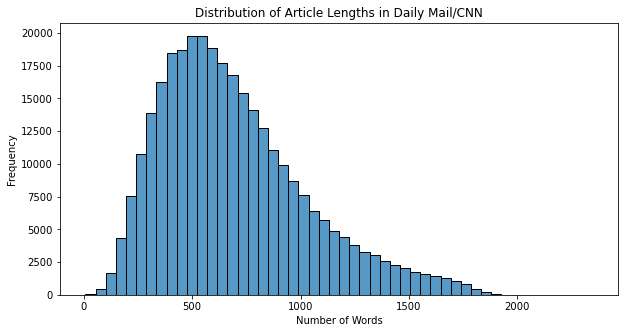

In [16]:
# Distribution of article length
daily_df['article_len'] = daily_df['article'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(data=daily_df, x='article_len', bins=50)
plt.title("Distribution of Article Lengths in Daily Mail/CNN")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

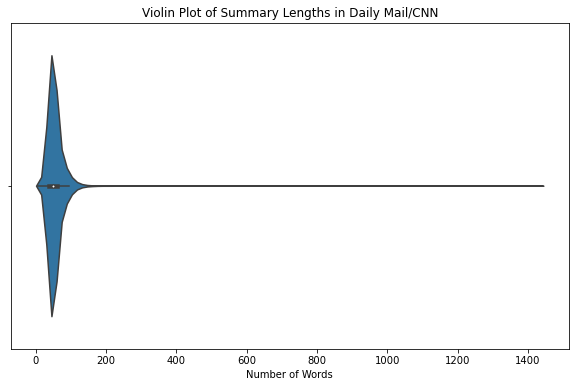

In [12]:
# Distribution of summary length
daily_df['summary_len'] = daily_df['highlights'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.violinplot(data=daily_df, x='summary_len')
plt.title("Violin Plot of Summary Lengths in Daily Mail/CNN")
plt.xlabel("Number of Words")
plt.show()

In [17]:
daily_df = daily_df[['article', 'highlights']].copy() # Create a copy of the relevant columns (Article and Summary)
print(daily_df.shape)
daily_df.drop_duplicates(inplace=True)
daily_df.dropna(axis=0,inplace=True)
print(daily_df.shape)

(311971, 2)
(308870, 2)


### Data Pre-processing for Daily Mail/CNN Dataset

#### Data Cleaning (Lowercasing, Removing Contractions, Punctuations, Special Characters, Numbers & Stop Words)

In [18]:
# Load the spaCy English model and set up the stop_words
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words

In [19]:
# Setting up the contraction_mapping to get rid of contractions in the text
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [20]:
def text_cleaner(text, num):
    """
    Cleans a text by performing various preprocessing steps such as removing unnecessary elements and normalizing the text.

    Args:
        text (str): The input text to be cleaned.
        num (int): A flag indicating whether to remove stopwords (0) or not (1).

    Returns:
        str: The cleaned and processed text.
    """
    # Replace newline characters with spaces
    text = text.replace('\n', ' ').replace('\n\n', ' ')
    
    # Convert to lowercase
    newString = text.lower()
    
    # Remove content within parentheses
    newString = re.sub(r'\([^)]*\)', '', newString)
    
    # Remove double quotes
    newString = re.sub('"', '', newString)
    
    # Replace contractions with their full forms
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    
    # Remove "'s" from words
    newString = re.sub(r"'s\b", "", newString)
    
    # Remove non-alphabetic characters
    newString = re.sub("[^a-zA-Z]", " ", newString)
    
    # Replace multiple occurrences of 'm' with 'mm'
    newString = re.sub('[m]{2,}', 'mm', newString)

    # Tokenize and remove stop words (if num == 0)
    if num == 0:
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens = newString.split()
    
    # Keep only words with more than one character
    long_words = [i for i in tokens if len(i) > 1]
    return (" ".join(long_words)).strip()

In [21]:
daily_cleaned_texts = []

# clean articles
for t in daily_df["article"]:
    daily_cleaned_texts.append(text_cleaner(t, 0)) # 0 to remove the stop words and get rid of unnecessary words

# clean summaries
daily_cleaned_summaries = []

for s in daily_df["highlights"]:
    daily_cleaned_summaries.append(text_cleaner(s, 1)) #1 to retain most of the summarized text

# create new dataframe for the cleaned texts and summaries 
daily_dataframe = pd.DataFrame(columns=["text", "summary"])

# put cleaned version of texts and summaries into the dataframe
daily_dataframe["text"] = daily_cleaned_texts
daily_dataframe["summary"] = daily_cleaned_summaries

In [22]:
daily_dataframe.head()

,text,summary
0,associated press published est october updated...,bishop john folda of north dakota is taking ti...
1,ralph mata internal affairs lieutenant miami d...,criminal complaint cop used his role to help c...
2,drunk driver killed young woman head crash che...,craig eccleston todd had drunk at least three ...
3,breezy sweep pen president vladimir putin wrot...,nina dos santos says europe must be ready to a...
4,fleetwood team record sky bet league win scunt...,fleetwood top of league one after win at scunt...


In [23]:
daily_dataframe.replace('', np.nan, inplace=True)
daily_dataframe.dropna(axis=0,inplace=True)

In [24]:
daily_dataframe.shape

(308870, 2)

#### Removing outliers 

In [25]:
def text_length_percentile(df, text_column, percentile):
    """
    Calculate the text length at which a given percentile of texts are below that length.
    
    Args:
    df (pandas.DataFrame): The DataFrame containing the text data.
    text_column (str): The column name containing the text data.
    percentile (float): The percentile to calculate (between 0 and 100).
    
    Returns:
    int: The text length at the given percentile.
    """
    # Calculate the length of each text
    text_lengths = df[text_column].apply(lambda x: len(x.split()))
    
    # Calculate the length at the given percentile
    length_at_percentile = np.percentile(text_lengths, percentile)
    
    return int(length_at_percentile)

percentile = 90

length_at_the_percentile = text_length_percentile(daily_dataframe, 'text', percentile)
print(f"{percentile}% of the texts are below this length: {length_at_the_percentile}")

length_at_the_percentile = text_length_percentile(daily_dataframe, 'summary', percentile)
print(f"{percentile}% of the summaries are below this length: {length_at_the_percentile}")

90% of the texts are below this length: 575
90% of the summaries are below this length: 70


In [26]:
DAILY_MAX_TEXT_LEN = 575
DAILY_MAX_SUMMARY_LEN = 70

In [27]:
daily_cleaned_text = np.array(daily_dataframe["text"])
daily_cleaned_summary = np.array(daily_dataframe["summary"])

# define lists for short text and short summaries
daily_short_text = []
daily_short_summary = []

# clean outliers
for i in range(len(daily_cleaned_text)):
    if(len(daily_cleaned_summary[i].split()) <= DAILY_MAX_SUMMARY_LEN and len(daily_cleaned_text[i].split()) <= DAILY_MAX_TEXT_LEN):
        daily_short_text.append(daily_cleaned_text[i])
        daily_short_summary.append(daily_cleaned_summary[i])

# change the dataframe
final_dataframe = pd.DataFrame({"source_text":daily_short_text, "target_text":daily_short_summary})

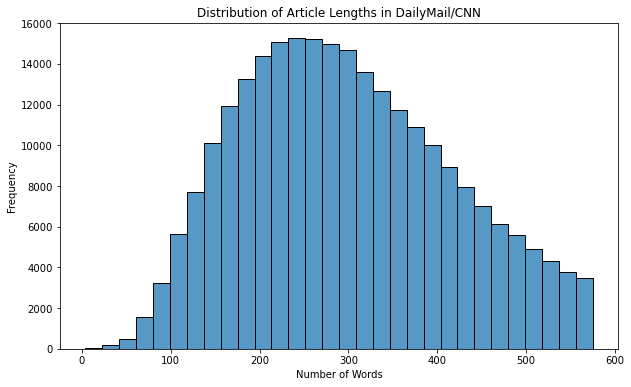

In [31]:
# Distribution of article length after removing outliers
final_dataframe['article_len'] = final_dataframe['source_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=final_dataframe, x='article_len', bins=30)
plt.title('Distribution of Article Lengths in DailyMail/CNN')
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

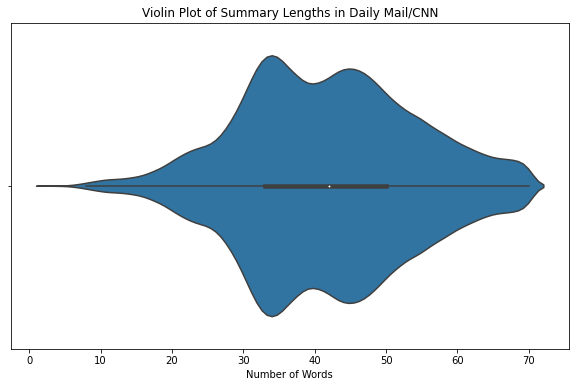

In [30]:
# Distribution of summary length
final_dataframe['summary_len'] = final_dataframe['target_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.violinplot(data=final_dataframe, x='summary_len')
plt.title("Violin Plot of Summary Lengths in Daily Mail/CNN")
plt.xlabel("Number of Words")
plt.show()

In [ ]:
final_dataframe

In [ ]:
final_dataframe.to_csv('cnn_dailymail.csv')

### Load BBC News Dataset

In [32]:
def read_files_from_folder(folder_path):
    """
    Reads text files from subfolders in the specified folder path.

    Args:
        folder_path (str): The path to the main folder containing subfolders for different categories.

    Returns:
        list: A list of tuples, each containing the category, filename, and content of a file.
    """
    
    data = []
    categories = ['business', 'entertainment', 'politics', 'sport', 'tech']
    
    for category in categories:
        category_path = os.path.join(folder_path, category)
        if os.path.exists(category_path):
            print(f"Reading files from category: {category}")
            for filename in os.listdir(category_path):
                file_path = os.path.join(category_path, filename)
                if os.path.isfile(file_path):
                    try:
                        with open(file_path, 'r', encoding='utf-8') as file:
                            content = file.read()
                    except UnicodeDecodeError:
                        with open(file_path, 'r', encoding='ISO-8859-1') as file:
                            content = file.read()
                    data.append((category, filename, content))
        else:
            print(f"Category folder not found: {category_path}")
                    
    return data

# Paths to the folders
articles_folder = '/Users/mac/Documents/BU Documents\/School/Project /Project Code/BBC News Summary/News Articles'
summaries_folder = '/Users/mac/Documents/BU Documents\/School/Project /Project Code/BBC News Summary/Summaries'

# Read the data
articles_data = read_files_from_folder(articles_folder)
summaries_data = read_files_from_folder(summaries_folder)

# Check if data is read correctly
print(f"Number of articles read: {len(articles_data)}")
print(f"Number of summaries read: {len(summaries_data)}")

# Create DataFrames
df_articles = pd.DataFrame(articles_data, columns=['Category', 'Filename', 'Article'])
df_summaries = pd.DataFrame(summaries_data, columns=['Category', 'Filename', 'Summary'])

# Merge the DataFrames on 'Category' and 'Filename'
data = pd.merge(df_articles, df_summaries, on=['Category', 'Filename'])
data.head()

Reading files from category: business
Reading files from category: entertainment
Reading files from category: politics
Reading files from category: sport
Reading files from category: tech
Reading files from category: business
Reading files from category: entertainment
Reading files from category: politics
Reading files from category: sport
Reading files from category: tech
Number of articles read: 2225
Number of summaries read: 2225


,Category,Filename,Article,Summary
0,business,289.txt,UK economy facing 'major risks'\n\nThe UK manu...,"""Despite some positive news for the export sec..."
1,business,504.txt,Aids and climate top Davos agenda\n\nClimate c...,"At the same time, about 100,000 people are exp..."
2,business,262.txt,Asian quake hits European shares\n\nShares in ...,The unfolding scale of the disaster in south A...
3,business,276.txt,India power shares jump on debut\n\nShares in ...,"Shares in India's largest power producer, Nati..."
4,business,510.txt,Lacroix label bought by US firm\n\nLuxury good...,LVMH said the French designer's haute couture ...


In [33]:
df_articles

,Category,Filename,Article
0,business,289.txt,UK economy facing 'major risks'\n\nThe UK manu...
1,business,504.txt,Aids and climate top Davos agenda\n\nClimate c...
2,business,262.txt,Asian quake hits European shares\n\nShares in ...
3,business,276.txt,India power shares jump on debut\n\nShares in ...
4,business,510.txt,Lacroix label bought by US firm\n\nLuxury good...
...,...,...,...
2220,tech,086.txt,Warning over Windows Word files\n\nWriting a M...
2221,tech,253.txt,Fast lifts rise into record books\n\nTwo high-...
2222,tech,247.txt,Nintendo adds media playing to DS\n\nNintendo ...
2223,tech,290.txt,Fast moving phone viruses appear\n\nSecurity f...


In [34]:
df_summaries

,Category,Filename,Summary
0,business,289.txt,"""Despite some positive news for the export sec..."
1,business,504.txt,"At the same time, about 100,000 people are exp..."
2,business,262.txt,The unfolding scale of the disaster in south A...
3,business,276.txt,"Shares in India's largest power producer, Nati..."
4,business,510.txt,LVMH said the French designer's haute couture ...
...,...,...,...
2220,tech,086.txt,Writing a Microsoft Word document can be a dan...
2221,tech,253.txt,The lifts take only 30 seconds to whisk passen...
2222,tech,247.txt,Nintendo is releasing an adapter for its DS ha...
2223,tech,290.txt,The new strains of the Cabir mobile phone viru...


In [35]:
df = data[['Article', 'Summary', 'Category']].copy() # Creating a copy of the relevant columns (Article, Category and Summary) in the dataset
print(df.shape)
df.drop_duplicates(inplace=True)
df.dropna(axis=0,inplace=True)
print(df.shape)

(2225, 3)
(2127, 3)


In [36]:
df

,Article,Summary,Category
0,UK economy facing 'major risks'\n\nThe UK manu...,"""Despite some positive news for the export sec...",business
1,Aids and climate top Davos agenda\n\nClimate c...,"At the same time, about 100,000 people are exp...",business
2,Asian quake hits European shares\n\nShares in ...,The unfolding scale of the disaster in south A...,business
3,India power shares jump on debut\n\nShares in ...,"Shares in India's largest power producer, Nati...",business
4,Lacroix label bought by US firm\n\nLuxury good...,LVMH said the French designer's haute couture ...,business
...,...,...,...
2220,Warning over Windows Word files\n\nWriting a M...,Writing a Microsoft Word document can be a dan...,tech
2221,Fast lifts rise into record books\n\nTwo high-...,The lifts take only 30 seconds to whisk passen...,tech
2222,Nintendo adds media playing to DS\n\nNintendo ...,Nintendo is releasing an adapter for its DS ha...,tech
2223,Fast moving phone viruses appear\n\nSecurity f...,The new strains of the Cabir mobile phone viru...,tech


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2127 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Article   2127 non-null   object
 1   Summary   2127 non-null   object
 2   Category  2127 non-null   object
dtypes: object(3)
memory usage: 66.5+ KB


### Data Exploration

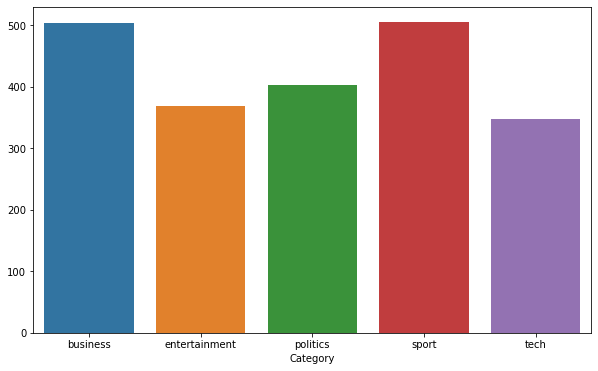

In [38]:
category_sizes = df.groupby('Category').size()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sizes.index, y=category_sizes)
plt.show()

In [39]:
#getting the length of each article and summary for analysis
df['articles_length'] = df['Article'].apply(lambda x: len(x.split()))
df['summaries_length'] = df['Summary'].apply(lambda x: len(x.split()))

In [40]:
df

,Article,Summary,Category,articles_length,summaries_length
0,UK economy facing 'major risks'\n\nThe UK manu...,"""Despite some positive news for the export sec...",business,324,129
1,Aids and climate top Davos agenda\n\nClimate c...,"At the same time, about 100,000 people are exp...",business,448,259
2,Asian quake hits European shares\n\nShares in ...,The unfolding scale of the disaster in south A...,business,546,253
3,India power shares jump on debut\n\nShares in ...,"Shares in India's largest power producer, Nati...",business,173,71
4,Lacroix label bought by US firm\n\nLuxury good...,LVMH said the French designer's haute couture ...,business,150,47
...,...,...,...,...,...
2220,Warning over Windows Word files\n\nWriting a M...,Writing a Microsoft Word document can be a dan...,tech,460,182
2221,Fast lifts rise into record books\n\nTwo high-...,The lifts take only 30 seconds to whisk passen...,tech,384,205
2222,Nintendo adds media playing to DS\n\nNintendo ...,Nintendo is releasing an adapter for its DS ha...,tech,293,102
2223,Fast moving phone viruses appear\n\nSecurity f...,The new strains of the Cabir mobile phone viru...,tech,331,138


In [41]:
category_length = df.groupby('Category',0).agg({'articles_length': 'mean', 'summaries_length': 'mean'})
category_length

,articles_length,summaries_length
Category,,
business,328.675944,139.825050
entertainment,332.707317,145.027100
politics,456.220844,196.799007
sport,330.623762,143.782178
tech,513.236311,218.855908


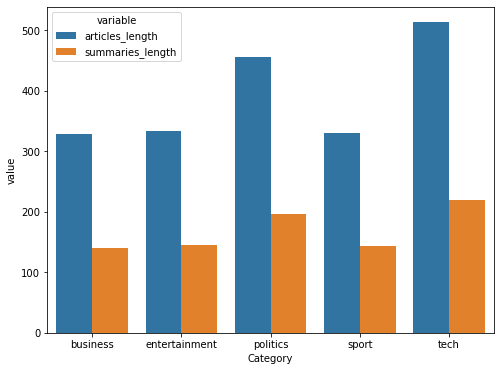

In [42]:
df_cp = pd.melt(category_length, ignore_index=False)
plt.figure(figsize=(8,6))
sns.barplot(x=df_cp.index, y="value", hue='variable', data=df_cp)
plt.show()

In [43]:
tmp_df = pd.DataFrame({'Category': df['Category'].value_counts().index, 'files_count': df['Category'].value_counts().values})
fig = px.pie(tmp_df, values='files_count', names='Category', title=f"Categories Ratio")
fig.show()

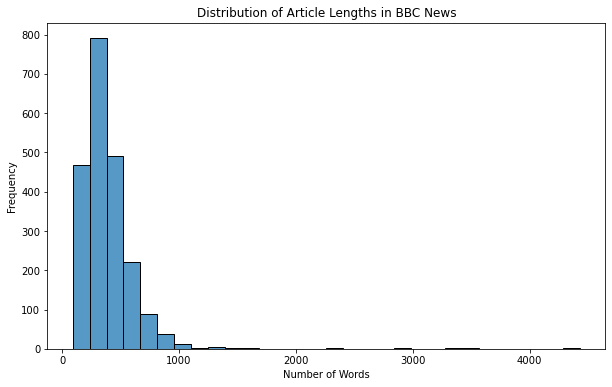

In [44]:
# Distribution of article length
df['article_len'] = df['Article'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='article_len', bins=30)
plt.title('Distribution of Article Lengths in BBC News')
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

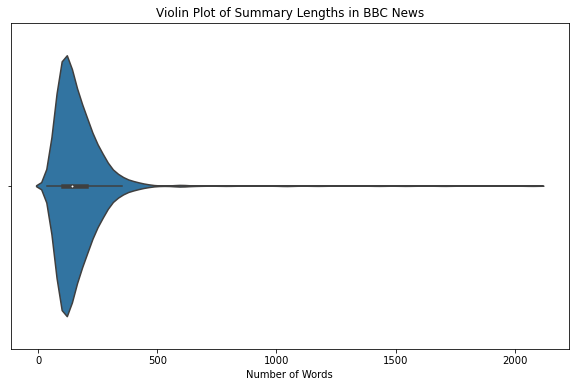

In [45]:
# Distribution of summary length
df['summary_len'] = df['Summary'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='summary_len')
plt.title("Violin Plot of Summary Lengths in BBC News")
plt.xlabel("Number of Words")
plt.show()

### Data Pre-processing for BBC News Dataset

In [49]:
df = data[['Article', 'Summary']].copy() # Create a copy of the relevant columns (Article and Summary)
print(df.shape)
df.drop_duplicates(inplace=True)
df.dropna(axis=0,inplace=True)
print(df.shape)

(2225, 2)
(2127, 2)


#### Data Cleaning (Lowercasing, Removing Contractions, Punctuations, Special Characters, Numbers & Stop Words)

In [50]:
clean_texts = []

# clean articles
for t in df["Article"]:
    clean_texts.append(text_cleaner(t, 0)) # 0 to remove the stop words and get rid of unnecessary words

# clean summaries
clean_summaries = []

for s in df["Summary"]:
    clean_summaries.append(text_cleaner(s, 1)) #1 to retain most of the summarized text

# create new dataframe for the cleaned texts and summaries 
dataframe = pd.DataFrame(columns=["text", "summary"])

# put cleaned version of texts and summaries into the dataframe
dataframe["text"] = clean_texts
dataframe["summary"] = clean_summaries

In [51]:
dataframe.head()

,text,summary
0,uk economy facing major risks uk manufacturing...,despite some positive news for the export sect...
1,aids climate davos agenda climate change fight...,at the same time about people are expected to ...
2,asian quake hits european shares shares europe...,the unfolding scale of the disaster in south a...
3,india power shares jump debut shares india lar...,shares in india largest power producer nationa...
4,lacroix label bought firm luxury goods group l...,lvmh said the french designer haute couture an...


In [52]:
dataframe.replace('', np.nan, inplace=True)
dataframe.dropna(axis=0,inplace=True)

#### Removing outliers

In [53]:
length_percentile = text_length_percentile(dataframe, 'text', percentile)
print(f"{percentile}% of the texts are below this length: {length_percentile}")

length_percentile = text_length_percentile(dataframe, 'summary', percentile)
print(f"{percentile}% of the summaries are below this length: {length_percentile}")


90% of the texts are below this length: 313
90% of the summaries are below this length: 269


In [54]:
MAX_TEXT_LENGTH = 313
MAX_SUMMARY_LENGTH = 269

In [55]:
clean_text = np.array(dataframe["text"])
clean_summary = np.array(dataframe["summary"])

# define lists for short text and short summaries
short_text = []
short_summary = []

# clean outliers
for i in range(len(clean_text)):
    if(len(clean_summary[i].split()) <= MAX_SUMMARY_LENGTH and len(clean_text[i].split()) <= MAX_TEXT_LENGTH):
        short_text.append(clean_text[i])
        short_summary.append(clean_summary[i])

# change the dataframe
last_dataframe = pd.DataFrame({"source_text":short_text, "target_text":short_summary})

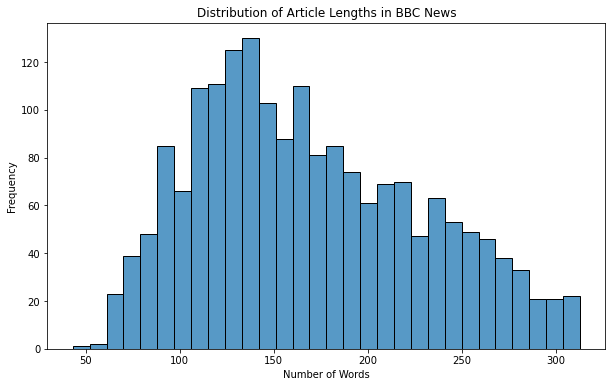

In [56]:
# Distribution of article length after removing outliers
last_dataframe['article_len'] = last_dataframe['source_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=last_dataframe, x='article_len', bins=30)
plt.title('Distribution of Article Lengths in BBC News')
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

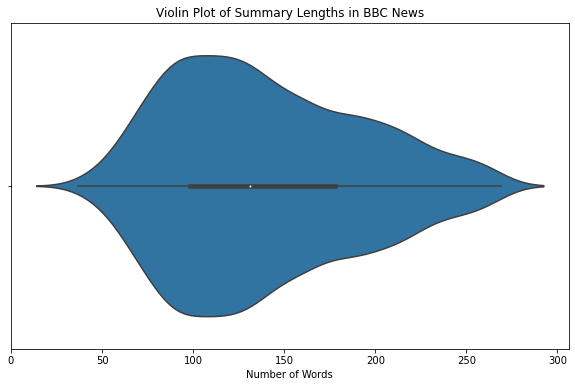

In [57]:
# Distribution of summary length
last_dataframe['summary_len'] = last_dataframe['target_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.violinplot(data=last_dataframe, x='summary_len')
plt.title("Violin Plot of Summary Lengths in BBC News")
plt.xlabel("Number of Words")
plt.show()

In [52]:
last_dataframe

,source_text,target_text,article_len
0,uk economy facing major risks uk manufacturing...,despite some positive news for the export sect...,171
1,aids climate davos agenda climate change fight...,at the same time about people are expected to ...,233
2,asian quake hits european shares shares europe...,the unfolding scale of the disaster in south a...,304
3,india power shares jump debut shares india lar...,shares in india largest power producer nationa...,105
4,lacroix label bought firm luxury goods group l...,lvmh said the french designer haute couture an...,91
...,...,...,...
1868,warning windows word files writing microsoft w...,writing microsoft word document can be dangero...,248
1869,fast lifts rise record books high speed lifts ...,the lifts take only seconds to whisk passenger...,196
1870,nintendo adds media playing ds nintendo releas...,nintendo is releasing an adapter for its ds ha...,152
1871,fast moving phone viruses appear security firm...,the new strains of the cabir mobile phone viru...,180


In [53]:
last_dataframe.to_csv('bbcnews.csv')